## Requirements

In [1]:
!pip install librosa
!pip install pydub
!pip install mutagen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 KB 2.5 MB/s eta 0:00:00


## Libraries

In [2]:
import os
import random
from os import listdir
from os.path import isfile, join
import shutil

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import minmax_scale

from scipy.stats import skew, kurtosis

import librosa
import librosa.display

from mutagen.mp3 import MP3

from pydub import AudioSegment
from pydub.utils import mediainfo

## Visualization

In [ ]:
dataPath = "/content/drive/MyDrive/MSC/MachineLearning/Project/dataset/"
audio = ["shoor/shoor1.mp3", "3gah/3gah1.mp3",  "mahoor/mahoor1.mp3", "humayoon/humayoon1.mp3",
         "5gah/5gah1.mp3", "nava/nava1.mp3", "4gah/4gah1.mp3"]

### Wave Plot

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

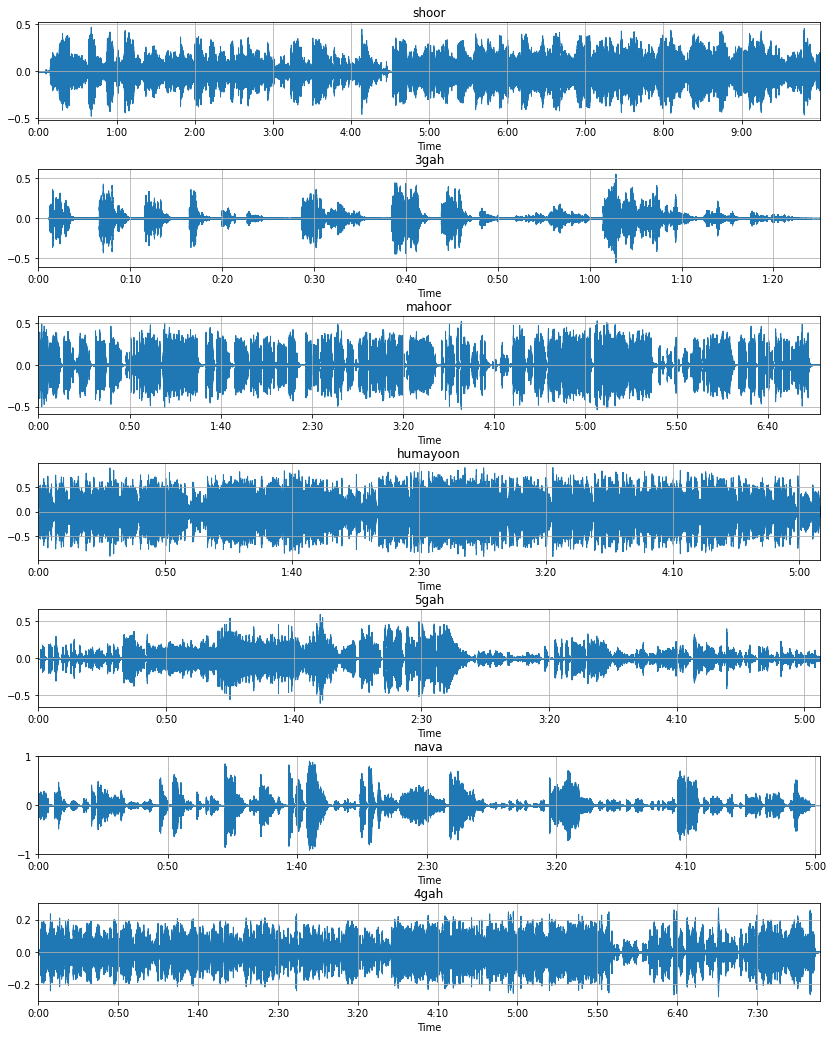

In [ ]:
plt.figure(figsize=(14,18))
i = 1

for aud in audio:
  x, sr = librosa.load(dataPath + aud)
  plt.subplot(7, 1, i)
  librosa.display.waveplot(x, sr=sr)
  plt.grid()
  plt.title(aud.split('/')[0])
  i = i + 1

plt.subplots_adjust(hspace=0.5)
plt.show()

### Spectrogram

A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time.

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

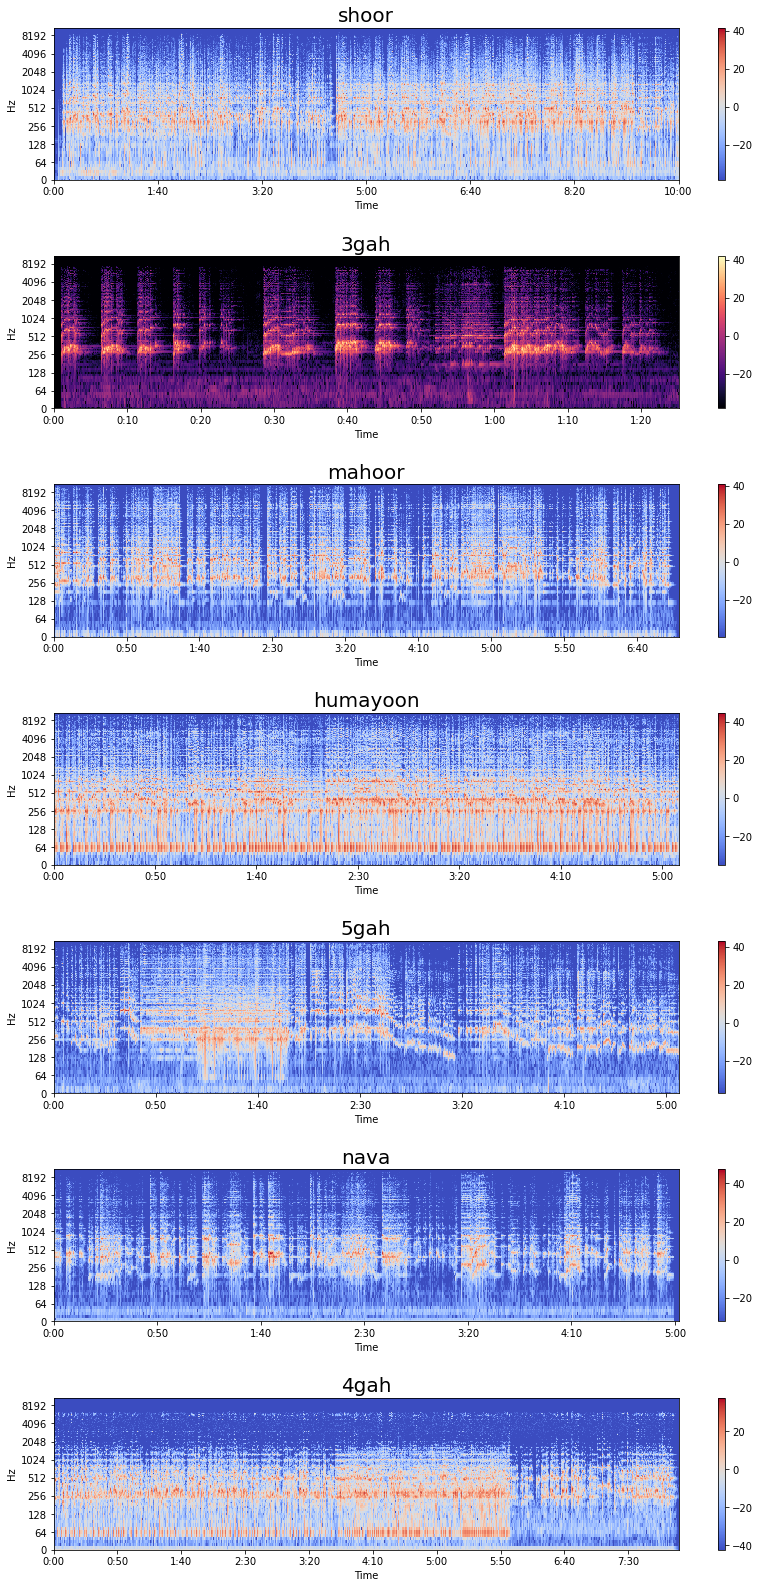

In [ ]:
plt.figure(figsize=(14,28))
i = 1

for aud in audio:
  x, sr = librosa.load(dataPath + aud)
  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.subplot(7, 1, i)
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log') #hz
  plt.colorbar()
  plt.title(aud.split('/')[0], fontsize=20)
  i = i + 1

plt.subplots_adjust(hspace=0.5)
plt.show()

### Zero Crossing

The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. It usually has higher values for highly percussive sounds like those in metal and rock.

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

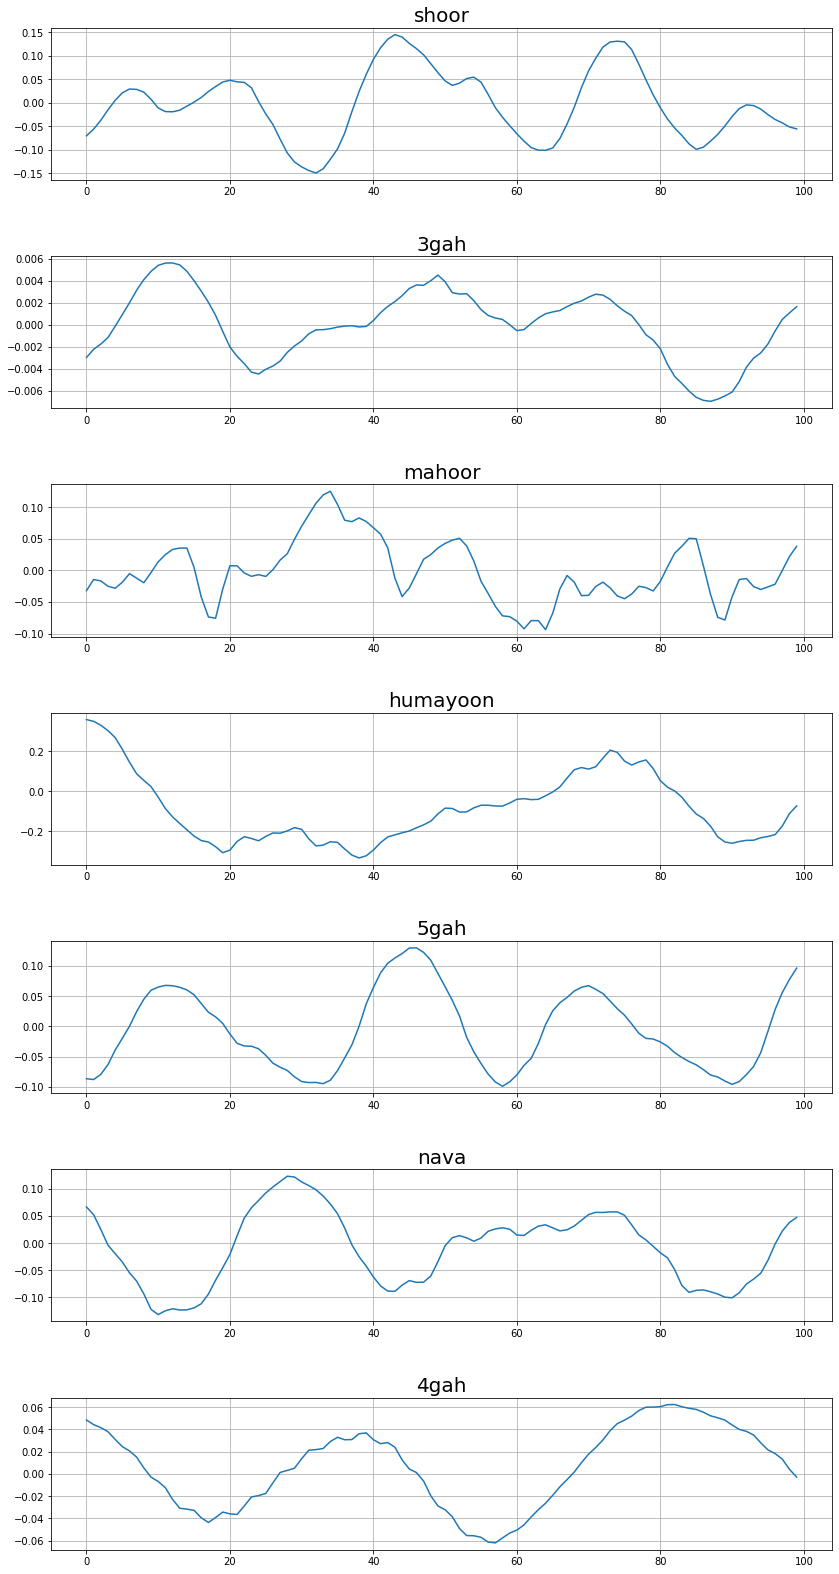

In [ ]:
plt.figure(figsize=(14,28))
i = 1

for aud in audio:
  x, sr = librosa.load(dataPath + aud)
  plt.subplot(7, 1, i)
  n0 = len(x) // 2
  plt.plot(x[n0:n0+100])
  plt.grid()
  plt.title(aud.split('/')[0], fontsize=20)
  i = i + 1

plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# Garbage Collector - use it like gc.collect()
import tensorflow as tf
import gc

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

### Spectral Centroid

It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

A sound spectrum displays the different frequencies present in a sound.

Similar to the zero crossing rate, there is a spurious rise in spectral centroid at the beginning of the signal. That is because the silence at the beginning has such small amplitude that high frequency components have a chance to dominate. One hack around this is to add a small constant before computing the spectral centroid, thus shifting the centroid toward zero at quiet portions:

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

[[1132.1541650920567, 98429.18932091864], [1427.0256007261275, 226178.90077901437], [1704.337021092271, 272391.5115726069], [1332.5755054833915, 120996.38415415578], [1899.532712654423, 385470.7825057245], [1339.07192994315, 118437.26619137193], [713.1357525862568, 69414.06749075382]]


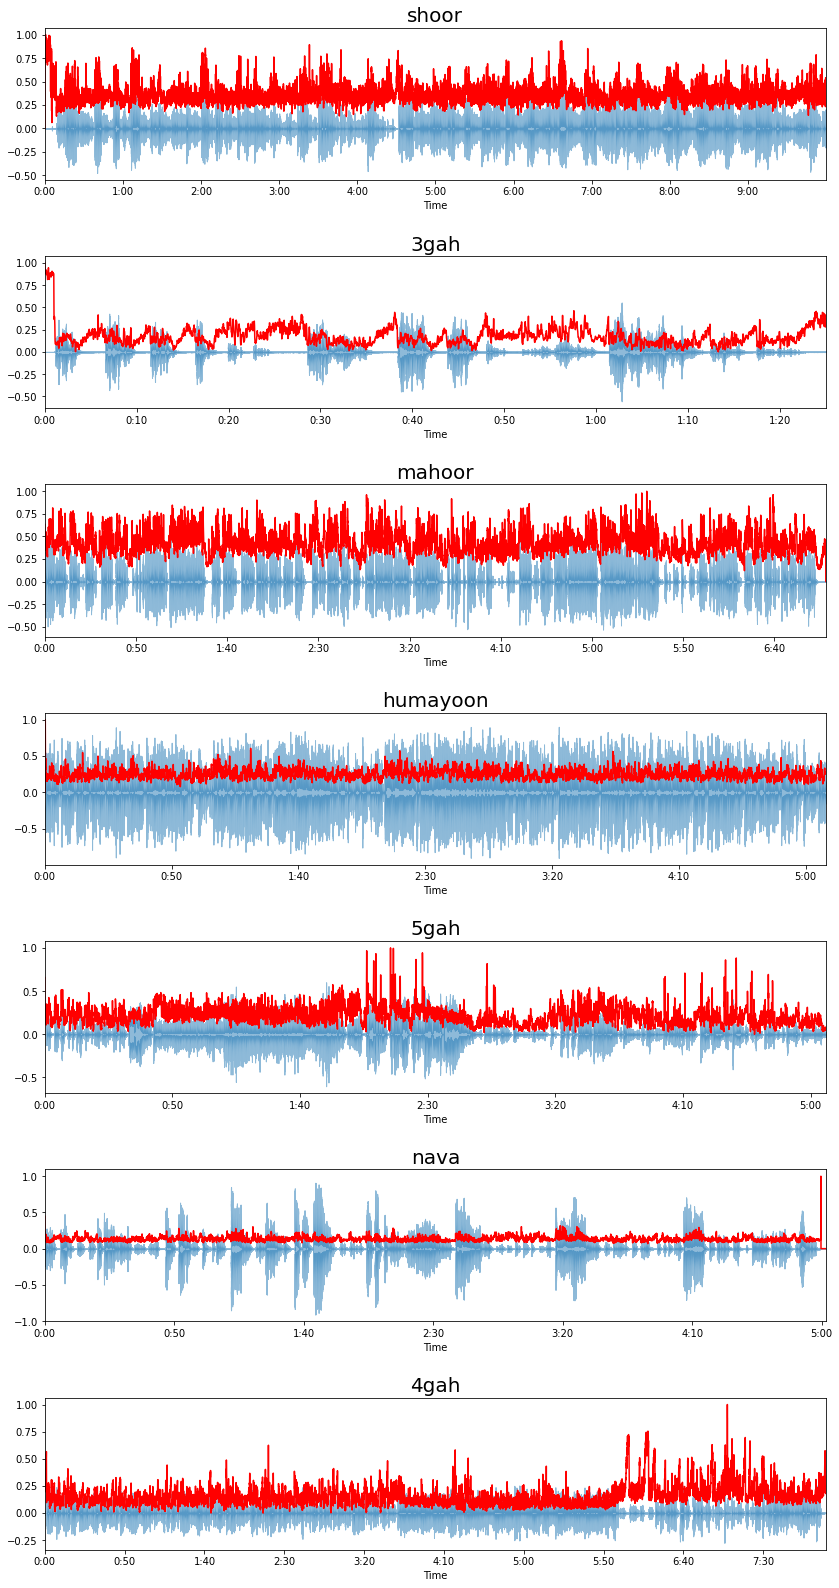

In [ ]:
spectralCentroid = []
plt.figure(figsize=(14,28))
i = 1
for aud in audio:
  x, sr = librosa.load(dataPath + aud)
  spectralCent = librosa.feature.spectral_centroid(x, sr=sr)[0]
  spectralCentroid.append([spectralCent.mean(), spectralCent.var()])
  plt.subplot(7, 1, i)
  frames = range(len(spectralCent))
  t = librosa.frames_to_time(frames)
  librosa.display.waveplot(x, sr=sr, alpha=0.5)
  plt.plot(t, minmax_scale(spectralCent, axis=0), color='r')
  plt.title(aud.split('/')[0], fontsize=20)
  i = i + 1

print(spectralCentroid)

plt.subplots_adjust(hspace=0.5)
plt.show()

### Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

In [ ]:
spectralRolloffs = []
plt.figure(figsize=(14,28))
i = 1
for aud in audio:
  x, sr = librosa.load(dataPath + aud)
  spectralRoll = librosa.feature.spectral_rolloff(x, sr=sr)[0]
  spectralRolloffs.append([spectralRoll.mean(), spectralRoll.var()])
  plt.subplot(7, 1, i)
  frames = range(len(spectralRoll))
  t = librosa.frames_to_time(frames)
  librosa.display.waveplot(x, sr=sr, alpha=0.5)
  plt.plot(t, minmax_scale(spectralRoll, axis=0), color='r')
  plt.title(aud.split('/')[0], fontsize=20)
  i = i + 1

print(spectralRolloffs)

plt.subplots_adjust(hspace=0.5)
plt.show()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

[[1937.1424530312743, 717532.4870092808], [3025.8177211302213, 1472443.218889832], [3493.1775476574353, 1754913.004565713], [2801.589851480046, 1181916.966611467], [3926.31056777117, 2026271.3369145144], [2563.9593081671383, 1485686.492587609], [1042.183531194395, 573357.4481334852]]


### Spectral Contrast

In [ ]:
spectralContrasts = []
plt.figure(figsize=(14,28))
i = 1
for aud in audio:
  x, sr = librosa.load(dataPath + aud)
  spectralCont = librosa.feature.spectral_contrast(x, sr=sr)
  spectralContrasts.append([spectralCont.mean(axis=1).tolist(), spectralCont.var(axis=1).tolist()])
  plt.subplot(7, 1, i)
  plt.imshow(minmax_scale(spectralCont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
  plt.title(aud.split('/')[0], fontsize=20)
  i = i + 1

plt.subplots_adjust(hspace=0.5)
plt.show()

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

### Chroma Frequencies

Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

(7, 2, 12)


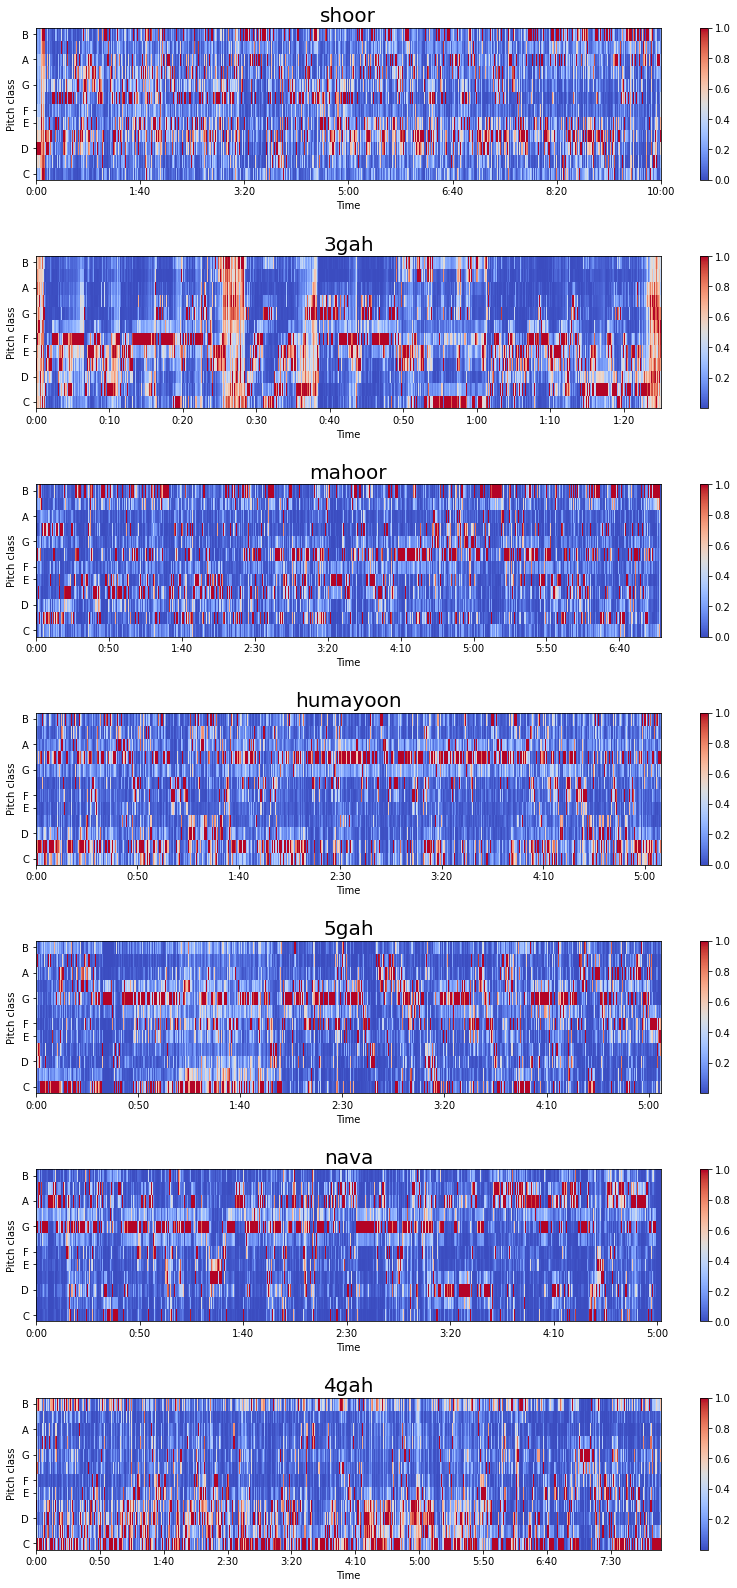

In [ ]:
chromagrams = []
plt.figure(figsize=(14,28))
i = 1
for aud in audio:
  x, sr = librosa.load(dataPath + aud)
  plt.subplot(7, 1, i)
  chroma = librosa.feature.chroma_stft(x, sr=sr)
  chromagrams.append([chroma.mean(axis=1).tolist(), chroma.var(axis=1).tolist()])
  img = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
  plt.colorbar(img)
  plt.title(aud.split('/')[0], fontsize=20)
  i = i + 1

print(np.asarray(chromagrams).shape)
plt.subplots_adjust(hspace=0.5)
plt.show()

### Mel-Frequency Cepstral Coefficients

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

MFCCs are commonly derived as follows:

Take the Fourier transform of (a windowed excerpt of) a signal. Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows or alternatively, cosine overlapping windows. Take the logs of the powers at each of the mel frequencies. Take the discrete cosine transform of the list of mel log powers, as if it were a signal. The MFCCs are the amplitudes of the resulting spectrum.

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

(7, 2, 12)


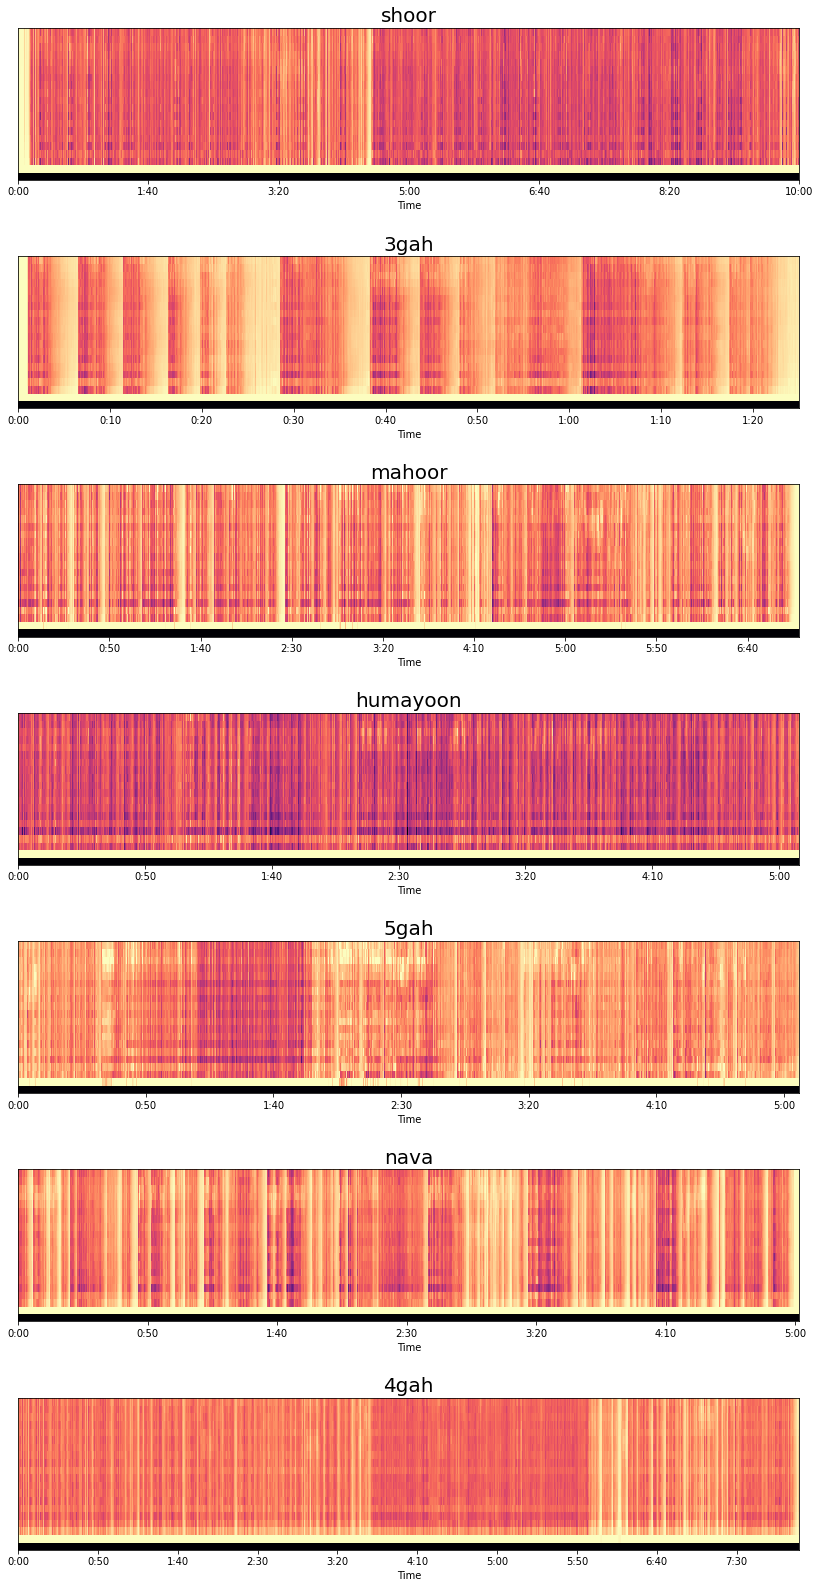

In [ ]:
MFCC = []
plt.figure(figsize=(14,28))
i = 1
for aud in audio:
  x, sr = librosa.load(dataPath + aud)
  plt.subplot(7, 1, i)
  mfcc = librosa.feature.mfcc(x, sr=sr)
  MFCC.append([mfcc.mean(axis=1).tolist(), mfcc.var(axis=1).tolist()])
  librosa.display.specshow(minmax_scale(mfcc), sr=sr, x_axis='time')
  plt.title(aud.split('/')[0], fontsize=20)
  i = i + 1

print(np.asarray(chromagrams).shape)
plt.subplots_adjust(hspace=0.5)
plt.show()

### Number of frequency features extracted

In [ ]:
print("Spectral Centroids: ", np.asarray(spectralCentroid).shape)
print("Spectral Rolloffs : ", np.asarray(spectralRolloffs).shape)
print("Spectral Contrasts: ", np.asarray(spectralContrasts).shape)
print("Chromagrams       : ", np.asarray(chromagrams).shape)
print("MFCC              : ", np.asarray(MFCC).shape)

Spectral Centroids:  (7, 2)
Spectral Rolloffs :  (7, 2)
Spectral Contrasts:  (7, 2, 7)
Chromagrams       :  (7, 2, 12)
MFCC              :  (7, 2, 20)


## Feature Extraction on whole data

In [3]:
DATA_PATH = "/content/drive/MyDrive/MSC/MachineLearning/Project/data"
finalPath = "/content/drive/MyDrive/MSC/MachineLearning/Project/finalData"

### Bad Files Detection

In [ ]:
def findBadFiles(dataPath, badFiles):
  result = []
  for subdirs, dirs, files in os.walk(dataPath):
    for subdir in dirs:
      subdirPath = DATA_PATH + os.sep + subdir
      for subdirs1, dirs1, files1 in os.walk(str(subdirPath)):
        for file in tqdm(files1):
          filePath = subdirPath + os.sep + subdirs1.split(os.sep)[-1] + os.sep + file
          try:
            audio = MP3(filePath)
            result.append(int(audio.info.length))
          except:
            badFiles.append(filePath)
            pass
  return result
badFiles = []
result = findBadFiles(DATA_PATH, badFiles)

0it [00:00, ?it/s]
100%|██████████| 19/19 [00:18<00:00,  1.01it/s]
0it [00:00, ?it/s]
100%|██████████| 24/24 [00:20<00:00,  1.19it/s]
0it [00:00, ?it/s]
100%|██████████| 25/25 [00:22<00:00,  1.11it/s]
0it [00:00, ?it/s]
100%|██████████| 32/32 [00:24<00:00,  1.32it/s]
0it [00:00, ?it/s]
100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:08<00:00,  1.18it/s]
0it [00:00, ?it/s]
100%|██████████| 31/31 [00:25<00:00,  1.23it/s]
0it [00:00, ?it/s]
100%|██████████| 28/28 [00:23<00:00,  1.19it/s]


In [ ]:
print(len(badFiles))
print(len(result))

149
800


In [ ]:
sorted(result)[:10]

[4, 4, 7, 11, 15, 16, 21, 21, 21, 23]

In [ ]:
import csv
badPath = "/content/drive/MyDrive/MSC/MachineLearning/Project/badFiles.csv"

with open(badPath,'w') as f:
  write = csv.writer(f)
  write.writerow(badFiles)

In [ ]:
badPath = "/content/drive/MyDrive/MSC/MachineLearning/Project/badFiles.csv"
bad = pd.read_csv(badPath)
badFiles = list(bad.columns.values)

### Split and Extract Features

#### Time Domain Features

In [ ]:
#Function for calculating the amplitude envelope
def amplitudeEnvelope(signal, frameSize, hopLength):
  return np.array([max(signal[i:i+frameSize]) for i in range(0, signal.size, hopLength)])

In [ ]:
def getMeanAcceleration(signal, frameSize, hopLength):
    mean = []
    for i in range(0, len(signal), hopLength):
        current_mean = np.sum(signal[i:i+frameSize])/frameSize
        mean.append(current_mean)
    return mean

In [ ]:
def getRmsAcceleration(signal, frameSize, hopLength):
    rms = []
    for i in range(0, len(signal), hopLength):
        current_rms = np.sqrt(np.sum(signal[i:i+frameSize]**2)/frameSize)
        rms.append(current_rms)
    return rms

In [ ]:
def getStd(signal, frameSize, hopLength):
    fin_std = []
    for i in range(0, len(signal), hopLength):
        current_std = np.sqrt((np.sum((signal[i:i+frameSize] - (np.sum(signal[i:i+frameSize])/frameSize))**2))/(frameSize-1))
        fin_std.append(current_std)
    return fin_std

In [ ]:
def getVariance(signal, frameSize, hopLength):
    fin_var = []
    for i in range(0, len(signal), hopLength):
        current_var = (np.sum(np.sqrt(abs(signal[i:i+frameSize])))/frameSize)**2
        fin_var.append(current_var)
    return fin_var

In [ ]:
def getPeakAcceleration(signal, frameSize, hopLength):
    peak = []
    for i in range(0, len(signal), hopLength):
        current_frame = max(signal[i:i+frameSize])
        peak.append(current_frame)
    return np.array(peak)

In [ ]:
def getSkewness(signal, frameSize, hopLength):
    fin_skew = []
    for i in range(0, len(signal), hopLength):
        current_skew = skew(signal[i:i+frameSize])
        fin_skew.append(current_skew)
    return fin_skew

In [ ]:
def getKurtosis(signal, frameSize, hopLength):
    fin_kurt = []
    for i in range(0, len(signal), hopLength):
        current_kurt = kurtosis(signal[i:i+frameSize])
        fin_kurt.append(current_kurt)
    return fin_kurt

In [ ]:
def getCrestFactor(signal, frameSize, hopLength):
    crest_fac = []
    for i in range(0, len(signal), hopLength):
        curr_crest_fac = np.max(np.abs(signal[i:i+frameSize])) / skew(signal[i:i+frameSize])
        crest_fac.append(curr_crest_fac)                             
    return crest_fac

In [ ]:
def getMarginFactor(signal, frameSize, hopLength):
    mar_fac = []
    for i in range(0, len(signal), hopLength):
        curr_mar_fac = np.max(np.abs(signal[i:i+frameSize])) / ((np.sum(np.sqrt(np.abs(signal[i:i+frameSize])))/ frameSize**2))
        mar_fac.append(curr_mar_fac)                             
    return mar_fac

In [ ]:
def getShapeFactor(signal, frameSize, hopLength):
    fin_shape_fact = []
    for i in range(0, len(signal), hopLength):
        cur_shape_fact = np.sqrt(((np.sum(signal[i:i+frameSize]**2))/frameSize) / (np.sum(np.abs(signal[i:i+frameSize]))/frameSize))
        fin_shape_fact.append(cur_shape_fact)

    return fin_shape_fact

In [ ]:
def getImpulseFactor(signal, frameSize, hopLength):
    impulse_factor = []
    for i in range(0, len(signal), hopLength):
        current_impls = max(np.abs(signal[i:i+frameSize]))/(np.sum(np.abs(signal[i:i+frameSize])/frameSize))
        impulse_factor.append(current_impls)
    return impulse_factor

In [ ]:
def getAFactor(signal, frameSize, hopLength):
    A_factor = []
    for i in range(0, len(signal), hopLength):
        current_factor = max(signal[i:i+frameSize])/(np.std(signal[i:i+frameSize])*np.var(signal[i:i+frameSize]))
        A_factor.append(current_factor)
    return A_factor

In [ ]:
def getBFactor(signal, frameSize, hopLength):
    B_factor = []
    for i in range(0, len(signal), hopLength):
        current_b_factor = (kurtosis(signal[i:i+frameSize]))*(np.max(np.abs(signal[i:i+frameSize])) / skew(signal[i:i+frameSize]))/(np.sqrt((np.sum((signal[i:i+frameSize] - (np.sum(signal[i:i+frameSize])/frameSize))**2))/(frameSize-1)))
        B_factor.append(current_b_factor)
    return B_factor

#### Extract Features

In [ ]:
def extractFeatures(filePath, category):
  freqFeatures = []
  timeFeatures = []
  FRAME_SIZE = 65536
  HOP_LENGTH = 16384

  x, sr = librosa.load(filePath)

  # time domain features
  # zero crossing
  zeroCross = librosa.zero_crossings(x, pad=False)
  timeFeatures.append(sum(zeroCross)) # f1

  # amplitude envelope
  ae = amplitudeEnvelope(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += ae.tolist() # f2 - f29

  # mean acceleration
  meanAcc = getMeanAcceleration(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += meanAcc # f30 - 56

  # rms2
  rms2 = getRmsAcceleration(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += rms2

  # standard deviation
  std = getStd(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += std

  # variance
  var = getVariance(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += var

  # peak acceleration
  peakAcc = getPeakAcceleration(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += peakAcc.tolist()

  # skewness
  skew = getSkewness(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += skew

  # kurtosis
  kurtosis = getKurtosis(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += kurtosis

  # crest factor
  crest = getCrestFactor(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += crest

  # margin factor
  margin = getMarginFactor(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += margin

  # shape factor
  shape = getShapeFactor(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += shape

  # impuls factor
  impulse = getImpulseFactor(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += impulse

  # A factor
  aFactor = getAFactor(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += aFactor

  # B factor
  bFactor = getBFactor(x, FRAME_SIZE, HOP_LENGTH)
  timeFeatures += bFactor


  # frequency domain features
  # spectral centroids
  spectralCent = librosa.feature.spectral_centroid(x, sr=sr)[0]
  freqFeatures.append(spectralCent.mean()) # f1
  freqFeatures.append(spectralCent.var()) # f2

  # spectral rolloff
  spectralRoll = librosa.feature.spectral_rolloff(x, sr=sr)[0]
  freqFeatures.append(spectralRoll.mean()) # f3
  freqFeatures.append(spectralRoll.var()) # f4

  # spectral contrast
  spectralCont = librosa.feature.spectral_contrast(x, sr=sr)
  freqFeatures += spectralCont.mean(axis=1).tolist() # f5 - f11
  freqFeatures += spectralCont.var(axis=1).tolist()  # f12 - f18

  # chroma Frequencies
  chroma = librosa.feature.chroma_stft(x, sr=sr)
  freqFeatures += chroma.mean(axis=1).tolist() # f19 - f30
  freqFeatures += chroma.var(axis=1).tolist() # f31 - f42
  
  # Mel-Frequency Cepstral Coefficients
  mfcc = librosa.feature.mfcc(x, sr=sr)
  freqFeatures += mfcc.mean(axis=1).tolist() # f43 - f62
  freqFeatures += mfcc.var(axis=1).tolist() # f63 - f82

  return (freqFeatures, timeFeatures)

#### Split Music to Same Length

In [ ]:
def bernoulli(p=0.75): 
  return 1 if random.random() <= p else 0

def splitMusics(dataPath, finalPath, category, length):

  print(f"Splitting {category}")
  freqDataTrain = []
  timeDataTrain = []
  freqDataTest = []
  timeDataTest = []
  categoryPath = join(dataPath, category)
  for subdirs, dirs, files in os.walk(str(categoryPath)):
      for file in tqdm(files):
        filePath = categoryPath + os.sep + subdirs.split(os.sep)[-1]  + os.sep + file
        # if (not(isfile(file))):
        #   continue
        instrument = subdirs.split(os.sep)[-1].split('_')[1]
        label = category.split('_')[1]

        if(filePath in badFiles):
          continue

        sound = AudioSegment.from_file(filePath)
        soundLength = len(sound)

        numberOfParts = soundLength // length
        loss = soundLength - numberOfParts * length

        start = 0
        timeData = []
        freqData = []
        for j in range(numberOfParts):

          partFilePath = join(finalPath, "filename"  + ".wav")
          part = sound[start: start+length+1]
          part.export(partFilePath , format="wav")

          freqFeatures, timeFeatures = extractFeatures(partFilePath, category)

          # frequency features
          freqFeatures.append(instrument)
          freqFeatures.append(label)
          freqData.append(freqFeatures)

          # time domain features
          timeFeatures.append(instrument)
          timeFeatures.append(label)
          timeData.append(timeFeatures)

          start = start+length+1    

        if bernoulli():
          freqDataTrain += freqData
          timeDataTrain += timeData
          
        else:
          freqDataTest += freqData
          timeDataTest += timeData

  return (freqDataTrain, timeDataTrain, freqDataTest, timeDataTest)

#### Extract Features of Each Dastgah

In [ ]:
################################# Dastgah 0 #################################
freqDataTrainD0, timeDataTrainD0, freqDataTestD0, timeDataTestD0 = splitMusics(DATA_PATH, finalPath, 'D_0', 20000)
freqTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_0_freqFeaturesTrain.csv"
timeTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_0_timeFeaturesTrain.csv"
freqTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_0_freqFeaturesTest.csv"
timeTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_0_timeFeaturesTest.csv"

freqColumns =  ['f' + str(x) for x in range(1, 83)] + ['instrument'] + ['dastgah']
freqdf = pd.DataFrame(np.asarray(sum(freqDataTrainD0, [])), columns = freqColumns)
freqdf.to_csv(freqTrain, sep='\t', encoding='utf-8', index=False)

timeColumns = ['f' + str(x) for x in range(1,np.asarray(sum(timeDataTrainD0, [])).shape[1] +1)]
timedf = pd.DataFrame(np.asarray(sum(timeDataTrainD0, [])), columns = timeColumns)
timedf.to_csv(timeTrain, sep='\t', encoding='utf-8', index=False)

freqdf = pd.DataFrame(np.asarray(sum(freqDataTestD0, [])), columns = freqColumns)
freqdf.to_csv(freqTest, sep='\t', encoding='utf-8', index=False)

timedf = pd.DataFrame(np.asarray(sum(timeDataTestD0, [])), columns = timeColumns)
timedf.to_csv(timeTest, sep='\t', encoding='utf-8', index=False)

################################# Dastgah 1 #################################
freqDataTrainD1, timeDataTrainD1, freqDataTestD1, timeDataTestD1 = splitMusics(DATA_PATH, finalPath, 'D_1', 20000)
freqTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_1_freqFeaturesTrain.csv"
timeTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_1_timeFeaturesTrain.csv"
freqTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_1_freqFeaturesTest.csv"
timeTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_1_timeFeaturesTest.csv"

freqColumns =  ['f' + str(x) for x in range(1, 83)] + ['instrument'] + ['dastgah']
freqdf = pd.DataFrame(np.asarray(freqDataTrainD1), columns = freqColumns)
freqdf.to_csv(freqTrain, sep='\t', encoding='utf-8', index=False)

timeColumns = ['f' + str(x) for x in range(1,np.asarray(timeDataTrainD1).shape[1] +1)]
timedf = pd.DataFrame(np.asarray(timeDataTrainD1), columns = timeColumns)
timedf.to_csv(timeTrain, sep='\t', encoding='utf-8', index=False)

freqdf = pd.DataFrame(np.asarray(freqDataTestD1), columns = freqColumns)
freqdf.to_csv(freqTest, sep='\t', encoding='utf-8', index=False)

timedf = pd.DataFrame(np.asarray(timeDataTestD1), columns = timeColumns)
timedf.to_csv(timeTest, sep='\t', encoding='utf-8', index=False)

################################# Dastgah 2 #################################
freqDataTrainD2, timeDataTrainD2, freqDataTestD2, timeDataTestD2 = splitMusics(DATA_PATH, finalPath, 'D_2', 20000)
freqTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_2_freqFeaturesTrain.csv"
timeTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_2_timeFeaturesTrain.csv"
freqTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_2_freqFeaturesTest.csv"
timeTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_2_timeFeaturesTest.csv"

freqColumns =  ['f' + str(x) for x in range(1, 83)] + ['instrument'] + ['dastgah']
freqdf = pd.DataFrame(np.asarray(freqDataTrainD2), columns = freqColumns)
freqdf.to_csv(freqTrain, sep='\t', encoding='utf-8', index=False)

timeColumns = ['f' + str(x) for x in range(1,np.asarray(timeDataTrainD2).shape[1] +1)]
timedf = pd.DataFrame(np.asarray(timeDataTrainD2), columns = timeColumns)
timedf.to_csv(timeTrain, sep='\t', encoding='utf-8', index=False)

freqdf = pd.DataFrame(np.asarray(freqDataTestD2), columns = freqColumns)
freqdf.to_csv(freqTest, sep='\t', encoding='utf-8', index=False)

timedf = pd.DataFrame(np.asarray(timeDataTestD2), columns = timeColumns)
timedf.to_csv(timeTest, sep='\t', encoding='utf-8', index=False)

################################# Dastgah 3 #################################
freqDataTrainD3, timeDataTrainD3, freqDataTestD3, timeDataTestD3 = splitMusics(DATA_PATH, finalPath, 'D_3', 20000)
freqTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_3_freqFeaturesTrain.csv"
timeTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_3_timeFeaturesTrain.csv"
freqTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_3_freqFeaturesTest.csv"
timeTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_3_timeFeaturesTest.csv"

freqColumns =  ['f' + str(x) for x in range(1, 83)] + ['instrument'] + ['dastgah']
freqdf = pd.DataFrame(np.asarray(freqDataTrainD3), columns = freqColumns)
freqdf.to_csv(freqTrain, sep='\t', encoding='utf-8', index=False)

timeColumns = ['f' + str(x) for x in range(1,np.asarray(timeDataTrainD3).shape[1] +1)]
timedf = pd.DataFrame(np.asarray(timeDataTrainD3), columns = timeColumns)
timedf.to_csv(timeTrain, sep='\t', encoding='utf-8', index=False)

freqdf = pd.DataFrame(np.asarray(freqDataTestD3), columns = freqColumns)
freqdf.to_csv(freqTest, sep='\t', encoding='utf-8', index=False)

timedf = pd.DataFrame(np.asarray(timeDataTestD3), columns = timeColumns)
timedf.to_csv(timeTest, sep='\t', encoding='utf-8', index=False)

################################# Dastgah 4 #################################
freqDataTrainD4, timeDataTrainD4, freqDataTestD4, timeDataTestD4 = splitMusics(DATA_PATH, finalPath, 'D_4', 20000)
freqTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_4_freqFeaturesTrain.csv"
timeTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_4_timeFeaturesTrain.csv"
freqTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_4_freqFeaturesTest.csv"
timeTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_4_timeFeaturesTest.csv"

freqColumns =  ['f' + str(x) for x in range(1, 83)] + ['instrument'] + ['dastgah']
freqdf = pd.DataFrame(np.asarray(freqDataTrainD4), columns = freqColumns)
freqdf.to_csv(freqTrain, sep='\t', encoding='utf-8', index=False)

timeColumns = ['f' + str(x) for x in range(1,np.asarray(timeDataTrainD4).shape[1] +1)]
timedf = pd.DataFrame(np.asarray(timeDataTrainD4), columns = timeColumns)
timedf.to_csv(timeTrain, sep='\t', encoding='utf-8', index=False)

freqdf = pd.DataFrame(np.asarray(freqDataTestD4), columns = freqColumns)
freqdf.to_csv(freqTest, sep='\t', encoding='utf-8', index=False)

timedf = pd.DataFrame(np.asarray(timeDataTestD4), columns = timeColumns)
timedf.to_csv(timeTest, sep='\t', encoding='utf-8', index=False)

################################# Dastgah 5 #################################
freqDataTrainD5, timeDataTrainD5, freqDataTestD5, timeDataTestD5 = splitMusics(DATA_PATH, finalPath, 'D_5', 20000)
freqTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_5_freqFeaturesTrain.csv"
timeTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_5_timeFeaturesTrain.csv"
freqTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_5_freqFeaturesTest.csv"
timeTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_5_timeFeaturesTest.csv"

freqColumns =  ['f' + str(x) for x in range(1, 83)] + ['instrument'] + ['dastgah']
freqdf = pd.DataFrame(np.asarray(freqDataTrainD5), columns = freqColumns)
freqdf.to_csv(freqTrain, sep='\t', encoding='utf-8', index=False)

timeColumns = ['f' + str(x) for x in range(1,np.asarray(timeDataTrainD5).shape[1] +1)]
timedf = pd.DataFrame(np.asarray(timeDataTrainD5), columns = timeColumns)
timedf.to_csv(timeTrain, sep='\t', encoding='utf-8', index=False)

freqdf = pd.DataFrame(np.asarray(freqDataTestD5), columns = freqColumns)
freqdf.to_csv(freqTest, sep='\t', encoding='utf-8', index=False)

timedf = pd.DataFrame(np.asarray(timeDataTestD5), columns = timeColumns)
timedf.to_csv(timeTest, sep='\t', encoding='utf-8', index=False)

################################# Dastgah 6 #################################
freqDataTrainD6, timeDataTrainD6, freqDataTestD6, timeDataTestD6 = splitMusics(DATA_PATH, finalPath, 'D_6', 20000)
freqTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_6_freqFeaturesTrain.csv"
timeTrain = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_6_timeFeaturesTrain.csv"
freqTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_6_freqFeaturesTest.csv"
timeTest  = "/content/drive/MyDrive/MSC/MachineLearning/Project/D_6_timeFeaturesTest.csv"

freqColumns =  ['f' + str(x) for x in range(1, 83)] + ['instrument'] + ['dastgah']
freqdf = pd.DataFrame(np.asarray(freqDataTrainD6), columns = freqColumns)
freqdf.to_csv(freqTrain, sep='\t', encoding='utf-8', index=False)

timeColumns = ['f' + str(x) for x in range(1,np.asarray(timeDataTrainD6).shape[1] +1)]
timedf = pd.DataFrame(np.asarray(timeDataTrainD6), columns = timeColumns)
timedf.to_csv(timeTrain, sep='\t', encoding='utf-8', index=False)

freqdf = pd.DataFrame(np.asarray(freqDataTestD6), columns = freqColumns)
freqdf.to_csv(freqTest, sep='\t', encoding='utf-8', index=False)

timedf = pd.DataFrame(np.asarray(timeDataTestD6), columns = timeColumns)
timedf.to_csv(timeTest, sep='\t', encoding='utf-8', index=False)

#### Merge all data

In [7]:
df0 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_0_freqFeaturesTrain.csv", sep='\t', encoding='utf-8')
df1 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_1_freqFeaturesTrain.csv", sep='\t', encoding='utf-8')
df2 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_2_freqFeaturesTrain.csv", sep='\t', encoding='utf-8')
df3 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_3_freqFeaturesTrain.csv", sep='\t', encoding='utf-8')
df4 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_4_freqFeaturesTrain.csv", sep='\t', encoding='utf-8')
df5 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_5_freqFeaturesTrain.csv", sep='\t', encoding='utf-8')
df6 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_6_freqFeaturesTrain.csv", sep='\t', encoding='utf-8')

dfList = [df0, df1, df2, df3, df4, df5, df6]
df = pd.concat(dfList)
df.drop(df.columns[0], axis=1, inplace=True)
df.to_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/freqFeaturesTrain.csv", index=False)

In [8]:
df0 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_0_timeFeaturesTrain.csv", sep='\t', encoding='utf-8')
df1 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_1_timeFeaturesTrain.csv", sep='\t', encoding='utf-8')
df2 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_2_timeFeaturesTrain.csv", sep='\t', encoding='utf-8')
df3 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_3_timeFeaturesTrain.csv", sep='\t', encoding='utf-8')
df4 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_4_timeFeaturesTrain.csv", sep='\t', encoding='utf-8')
df5 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_5_timeFeaturesTrain.csv", sep='\t', encoding='utf-8')
df6 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_6_timeFeaturesTrain.csv", sep='\t', encoding='utf-8')

dfList = [df0, df1, df2, df3, df4, df5, df6]
df = pd.concat(dfList)
df.drop(df.columns[0], axis=1, inplace=True)
df = df.rename(columns={'f380': 'instrument', 'f381': 'dastgah'})
df.to_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/timeFeaturesTrain.csv", index=False)

In [9]:
df0 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_0_freqFeaturesTest.csv", sep='\t', encoding='utf-8')
df1 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_1_freqFeaturesTest.csv", sep='\t', encoding='utf-8')
df2 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_2_freqFeaturesTest.csv", sep='\t', encoding='utf-8')
df3 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_3_freqFeaturesTest.csv", sep='\t', encoding='utf-8')
df4 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_4_freqFeaturesTest.csv", sep='\t', encoding='utf-8')
df5 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_5_freqFeaturesTest.csv", sep='\t', encoding='utf-8')
df6 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_6_freqFeaturesTest.csv", sep='\t', encoding='utf-8')

dfList = [df0, df1, df2, df3, df4, df5, df6]
df = pd.concat(dfList)
df.drop(df.columns[0], axis=1, inplace=True)
df.to_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/freqFeaturesTest.csv", index=False)

In [10]:
df0 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_0_timeFeaturesTest.csv", sep='\t', encoding='utf-8')
df1 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_1_timeFeaturesTest.csv", sep='\t', encoding='utf-8')
df2 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_2_timeFeaturesTest.csv", sep='\t', encoding='utf-8')
df3 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_3_timeFeaturesTest.csv", sep='\t', encoding='utf-8')
df4 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_4_timeFeaturesTest.csv", sep='\t', encoding='utf-8')
df5 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_5_timeFeaturesTest.csv", sep='\t', encoding='utf-8')
df6 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/finalData/D_6_timeFeaturesTest.csv", sep='\t', encoding='utf-8')

dfList = [df0, df1, df2, df3, df4, df5, df6]
df = pd.concat(dfList)
df.drop(df.columns[0], axis=1, inplace=True)
df = df.rename(columns={'f380': 'instrument', 'f381': 'dastgah'})
df.to_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/timeFeaturesTest.csv", index=False)

## MFCC Features 

In [ ]:
#setting melspec features
nMfcc = 10
hopLength = 2048
nFft = 8192

In [ ]:
def getMFCC(filePath, nFft = nFft, hopLength = hopLength, nMfcc = nMfcc):
  x, sr = librosa.load(filePath)
  mfcc = librosa.feature.mfcc(x, sr=sr, n_mfcc=nMfcc, n_fft=nFft, hop_length=hopLength)
  mfcc = mfcc.T
  return mfcc.tolist()

In [ ]:
def splitMusics2(dataPath, finalPath, category, length):

  print(f"Splitting {category}")
  data = {"labels":[], "mfcc":[]}
  categoryPath = join(dataPath, category)
  for subdirs, dirs, files in os.walk(str(categoryPath)):
      for file in tqdm(files):
        filePath = categoryPath + os.sep + subdirs.split(os.sep)[-1]  + os.sep + file
        label = category.split('_')[1]

        if(filePath in badFiles):
          continue

        sound = AudioSegment.from_file(filePath)
        soundLength = len(sound)

        numberOfParts = soundLength // length
        loss = soundLength - numberOfParts * length

        start = 0
        for j in range(numberOfParts):

          partFilePath = join(finalPath, "filename"  + ".wav")
          part = sound[start: start+length+1]
          part.export(partFilePath , format="wav")

          mfcc = getMFCC(partFilePath)
          data["labels"].append(label)
          data["mfcc"].append(mfcc)
          # mfcc.append(label)
          # MFCC.append(mfcc)

          start = start+length+1    
      
  return (data)

In [ ]:
finalPath = "/content/drive/MyDrive/MSC/MachineLearning/Project/finalData"
mfccD0 = splitMusics2(DATA_PATH, finalPath, 'D_0', 20000)

mfccD1 = splitMusics2(DATA_PATH, finalPath, 'D_1', 20000)

mfccD2 = splitMusics2(DATA_PATH, finalPath, 'D_2', 20000)

Splitting D_0


0it [00:00, ?it/s]
100%|██████████| 25/25 [04:06<00:00,  9.84s/it]


Splitting D_1


0it [00:00, ?it/s]
100%|██████████| 19/19 [03:35<00:00, 11.32s/it]


Splitting D_2


0it [00:00, ?it/s]
100%|██████████| 28/28 [04:39<00:00,  9.98s/it]


In [ ]:
finalPath = "/content/drive/MyDrive/MSC/MachineLearning/Project/finalData"
mfccD3 = splitMusics2(DATA_PATH, finalPath, 'D_3', 20000)

mfccD4 = splitMusics2(DATA_PATH, finalPath, 'D_4', 20000)

mfccD5 = splitMusics2(DATA_PATH, finalPath, 'D_5', 20000)

Splitting D_3


0it [00:00, ?it/s]
100%|██████████| 32/32 [06:50<00:00, 12.83s/it]


Splitting D_4


0it [00:00, ?it/s]
100%|██████████| 24/24 [02:43<00:00,  6.81s/it]


Splitting D_5


0it [00:00, ?it/s]
100%|██████████| 28/28 [02:58<00:00,  6.39s/it]
0it [00:00, ?it/s]
100%|██████████| 10/10 [01:21<00:00,  8.12s/it]


In [ ]:
finalPath = "/content/drive/MyDrive/MSC/MachineLearning/Project/finalData"
mfccD6 = splitMusics2(DATA_PATH, finalPath, 'D_6', 20000)

Splitting D_6


0it [00:00, ?it/s]
100%|██████████| 31/31 [03:44<00:00,  7.26s/it]


In [ ]:
print(np.array(mfccD6["mfcc"]).shape)

(1053, 216, 10)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/mfcc/D0_5.csv", header=None, index_col=[0,1])
A = np.array(df.agg(list, 1).groupby(level=0).agg(list).tolist())

In [ ]:
A.shape

(6699, 216, 10)

In [ ]:
A = np.concatenate([A, np.array(mfccD6["mfcc"])], 0)

In [ ]:
A.shape

(7752, 216, 10)

In [ ]:
pd.DataFrame(A.reshape((-1, A.shape[-1])), 
                index= pd.MultiIndex.from_product(
                   [range(A.shape[0]), range(A.shape[1])]
                   )
                    ).to_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/mfcc/D0_6.csv")

In [ ]:
l1 = pd.read_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/mfcc/labelsD0_5.csv").values.tolist()
# l1 = l1.drop('Unnamed: 0', axis=1).values.tolist()
pd.DataFrame( l1 + mfccD6["labels"]
                ).to_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/mfcc/labelsD0_6.csv", index=False)

In [ ]:
pd.DataFrame(np.array(mfccD3["labels"] + mfccD4["labels"] + mfccD5["labels"]).tolist()
                ).to_csv("/content/drive/MyDrive/MSC/MachineLearning/Project/mfcc/labelsD0_2.csv")